In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.10.1


In [3]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train,x_test = x_train/255.0,x_test/255.0

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


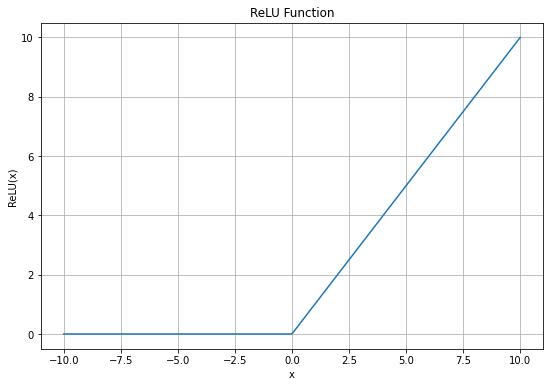

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# function to compute the ReLU of x
def relu(x):
    return np.maximum(0, x)

# create an array of numbers ranging from -10 to 10
x = np.linspace(-10, 10, 400)

# compute the ReLU of these numbers
y = relu(x)

# create a plot
plt.figure(figsize=(9, 6))
plt.plot(x, y)
plt.title("ReLU Function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.grid(True)
plt.show()

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2932 - accuracy: 0.9143
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1419 - accuracy: 0.9581
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1062 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0873 - accuracy: 0.9731
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0743 - accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0661 - accuracy: 0.9794
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0594 - accuracy: 0.9811
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0515 - accuracy: 0.9835
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0475 - accuracy: 0.9838
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.044

In [11]:
#ocena modelu
test_loss,test_accuracy = model.evaluate(x_test,y_test,verbose=2)
print(f'strata: {test_loss}, dokładnośc: {test_accuracy}')

313/313 - 1s - loss: 0.0695 - accuracy: 0.9795 - 587ms/epoch - 2ms/step
strata: 0.06946627795696259, dokładnośc: 0.9794999957084656


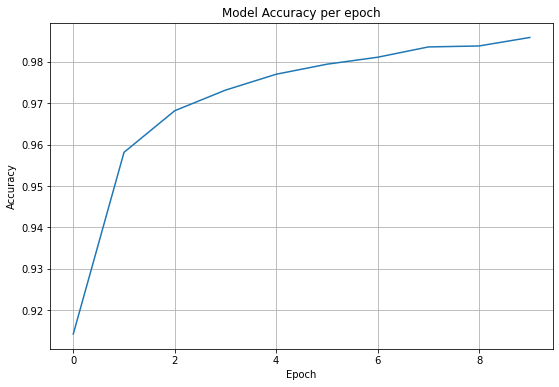

In [12]:
# Creating a function to visualize accuracy per epoch
def plot_history(history):
    plt.figure(figsize=(9,6))
    plt.plot(history.history['accuracy'])
    plt.title('Model Accuracy per epoch')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.grid(True)
    plt.show()

# Call the function with 'history' object
plot_history(history)